# Co 57

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


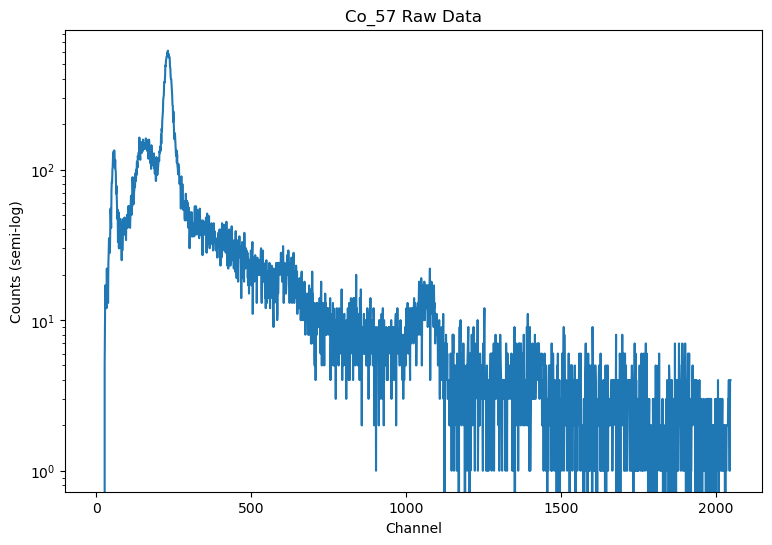

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#convert csv file to pd data frame (df), check first 10 values with df.head

Co_57_df = pd.read_csv("Co_57.csv")
print(Co_57_df.head())

# label x and y df columns & make raw data plot

Co_57_x = Co_57_df["Channel"]
Co_57_y = Co_57_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts (semi-log)")
plt.title("Co_57 Raw Data")

# use semi log y

plt.semilogy(Co_57_x, Co_57_y)
plt.show()

# Peak: 0.122 MeV

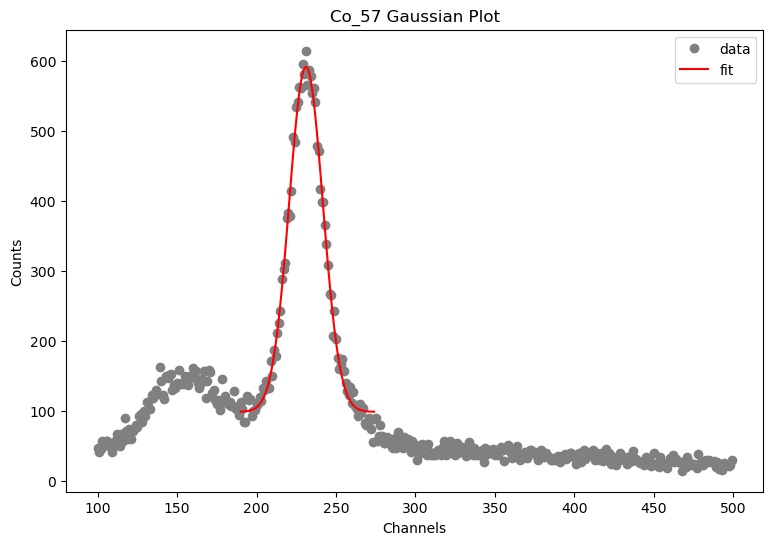

Fit Amplitude:  493.81848023867633 ± 4.788472328223596 
 Fit Mean:  231.12626045658828 ± 0.10731961114985057 
 Fit Epsilon:  111.84399901106285 ± 2.9131158463351534 
 Fit C :  98.29510036770503 ± 2.856223138235044


In [43]:
## define gaussian function with constants names 
def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit

# define x and y value ranges for gaussian
Co_57_x_slice = Co_57_x[190:275]
Co_57_y_slice = Co_57_y[190:275]

# define popt and pcov, solve for a, m, e, and c
Co_57_popt, Co_57_pcov = curve_fit( gaus, Co_57_x_slice, Co_57_y_slice, p0 = [a:=600, m:=250, e:=350, c:=0])

#create gaussian with fitted values
Co_57_y_fit= gaus( Co_57_x_slice, *Co_57_popt)

#define x and y value ranges for data to make peak visible in graph
Co_57_x_slice_data = Co_57_x[100:500]
Co_57_y_slice_data = Co_57_y[100:500]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Co_57_x_slice_data, Co_57_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Co_57_x_slice, Co_57_y_fit, 'r-', label='fit')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Co_57 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Co_57_pcov))          

print("Fit Amplitude: ", Co_57_popt[0], u"\u00B1" , sigma[0],
        "\n Fit Mean: ", Co_57_popt[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon: ", Co_57_popt[2], u"\u00B1", sigma[2],
        "\n Fit C : ", Co_57_popt[3], u"\u00B1", sigma[3])